Accuracy without Feature Scaling: 1.0
Confusion Matrix without Feature Scaling:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy with Feature Scaling: 1.0
Confusion Matrix with Feature Scaling:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


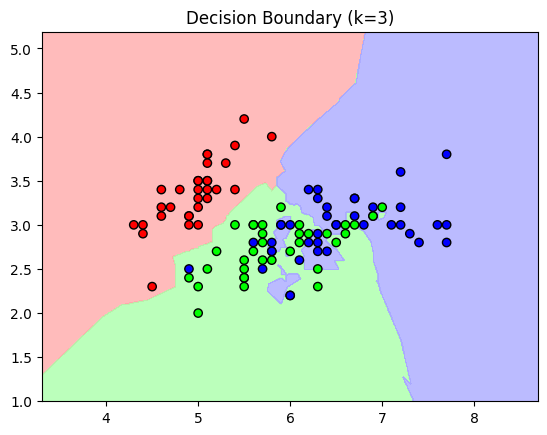

Accuracy with k=5: 1.0

Performance Comparison:
k=3 Without Scaling: 1.0
k=3 With Scaling: 1.0
k=5 With Scaling: 1.0


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


url ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=columns)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy_no_scaling = accuracy_score(y_test, y_pred)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred)

print("Accuracy without Feature Scaling:", accuracy_no_scaling)
print("Confusion Matrix without Feature Scaling:\n", conf_matrix_no_scaling)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_scaled)

print("Accuracy with Feature Scaling:", accuracy_with_scaling)
print("Confusion Matrix with Feature Scaling:\n", conf_matrix_with_scaling)


def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(cmap_bold))
    plt.title(title)
    plt.show()


X_visual = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visual, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)
plot_decision_boundary(X_train_vis, y_train_vis, knn_vis, "Decision Boundary (k=3)")


knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)
y_pred_k5 = knn_k5.predict(X_test_scaled)

accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print("Accuracy with k=5:", accuracy_k5)


print("\nPerformance Comparison:")
print(f"k=3 Without Scaling: {accuracy_no_scaling}")
print(f"k=3 With Scaling: {accuracy_with_scaling}")
print(f"k=5 With Scaling: {accuracy_k5}")